## WALIDACJA

Wszystkie operacje wykonane na zbiorze walidacyjnym, ale ramki zostają z 'train' w nazwie żeby nie trzeba było edytować całego kodu, komentarze zaczynają się literą V.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

Ładowanie i zapoznawanie się z danymi

In [2]:
data = pd.read_csv("validate.csv", low_memory=False)
data.head()

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,42083,0x10c95,CUS_0x61c2,April,Aradhana Aravindanw,23,008-17-0608,Lawyer,88752.26,7109.021667,...,Good,1180.26,36.713885,18 Years and 5 Months,No,72.524443,627.5721756392708,!@9#%8,290.8055480188755,Standard
1,71825,0x1badb,CUS_0x84a8,February,Kanekoe,5419,819-24-5756,Mechanic,87745.92,NaN,...,Good,207.0,36.121435,20 Years and 5 Months,NM,0.000000,366.7904443824298,Low_spent_Small_value_payments,639.8255556175702,Good
2,99535,0x25d35,CUS_0x85dd,August,Lucianam,45,767-36-7303,_______,8974.555,783.879583,...,_,1660.14,33.883240,16 Years and 10 Months,Yes,30.443262,57.441335697106105,Low_spent_Small_value_payments,280.50336019683317,Standard
3,47879,0x12e89,CUS_0x6172,August,Lefteris Papadimasd,32,794-09-7808,Manager,17091.96,1182.330000,...,Bad,4047.31,40.077930,8 Years and 5 Months,Yes,54.857946,__10000__,Low_spent_Small_value_payments,282.35488387401983,Poor
4,36734,0xed3c,CUS_0x253c,July,NaN,34,399-03-5425,Developer,49128.9,4231.075000,...,Standard,2574.1,29.415814,14 Years and 4 Months,Yes,169.529221,94.40828486614019,High_spent_Large_value_payments,399.1699940518158,Poor


In [3]:
data.Credit_Score.unique() 

array(['Standard', 'Good', 'Poor'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20000 non-null  int64  
 1   ID                        20000 non-null  object 
 2   Customer_ID               20000 non-null  object 
 3   Month                     20000 non-null  object 
 4   Name                      18013 non-null  object 
 5   Age                       20000 non-null  object 
 6   SSN                       20000 non-null  object 
 7   Occupation                20000 non-null  object 
 8   Annual_Income             20000 non-null  object 
 9   Monthly_Inhand_Salary     16966 non-null  float64
 10  Num_Bank_Accounts         20000 non-null  int64  
 11  Num_Credit_Card           20000 non-null  int64  
 12  Interest_Rate             20000 non-null  int64  
 13  Num_of_Loan               20000 non-null  object 
 14  Type_o

In [5]:
data.shape

(20000, 29)

Podział zbioru
V: Zbiór walidacyjny został wgrany na początku, dlatego nie jest wykonywana komórka z podziałem

In [6]:
'''
y = pd.Series(data['Credit_Score'])
X = data.drop(['Credit_Score'],axis=1)
# Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
     X_train, y_train, test_size=0.2, random_state=123
)
'''

"\ny = pd.Series(data['Credit_Score'])\nX = data.drop(['Credit_Score'],axis=1)\n# Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji\nX_train, X_val, y_train, y_val = train_test_split(\n    X, y, test_size=0.2, random_state=123\n)\nX_train, X_test, y_train, y_test = train_test_split(\n     X_train, y_train, test_size=0.2, random_state=123\n)\n"

V: Podział dokonany poprawnie, przed jakimikolwiek operacjami, test_size mógłby być większy 

Usuwanie kolumn i czyszczenie zbioru

In [66]:
def create_df(X,y):
    return X.join(y)

def drop_columns(df):
    drop_cols = ['ID','Customer_ID','Name','SSN','Num_Credit_Inquiries']
    df_dropped = df.drop(drop_cols , axis=1)
    return df_dropped

V: Na jakiej podstawie wyrzucona została kolumna Num_Credit_Inquiries? Wydaje się ona ważną kolumną, niosącą informacje - powinna zostać, szczególnie na początkowym etapie. Pozostałe kolumny są faktycznie zbyteczne (choć czy na pewno? - być może później przyda się customer_id).

In [8]:
Train_dropped = drop_columns(data)

In [9]:
for i in Train_dropped:
    print('\n',i,Train_dropped[i].unique())


 Month ['April' 'February' 'August' 'July' 'May' 'March' 'January' 'June']

 Age ['23' '5419' '45' '32' '34' '40' '20' '41' '24' '46' '44' '26' '29' '52'
 '31' '39' '38' '37' '19' '17' '35' '37_' '32_' '55_' '18' '54' '51' '15'
 '42' '25' '28' '16' '18_' '39_' '21' '33' '47' '44_' '55' '29_' '36' '30'
 '43' '49' '22' '50' '27' '36_' '48' '-500' '38_' '20_' '14' '19_' '1459'
 '46_' '33_' '28_' '50_' '25_' '41_' '53' '51_' '31_' '52_' '2512' '4301_'
 '2109' '26_' '21_' '4041' '1644' '6423' '27_' '35_' '54_' '15_' '34_'
 '17_' '56' '47_' '48_' '30_' '8005' '1083' '14_' '43_' '7746' '4155'
 '16_' '2650' '6121' '8450' '7133' '5509' '42_' '49_' '5902' '8049' '40_'
 '4775' '6341' '395' '6360' '4774' '701' '3607' '22_' '6381_' '3353'
 '5027' '7065' '2318' '532' '53_' '1265' '316' '2778' '995' '45_' '5981'
 '1808' '4422' '7099' '2540' '3085' '24_' '8080' '6048' '23_' '7715'
 '2090' '5426' '4444' '8592' '5507' '963' '3873' '528' '1695' '6237'
 '3818' '1407' '7549' '3651' '5253' '3213' '2744' '7

In [10]:
def clean_records(df):
    clean = df.copy()
    pattern = "\\`*_{}[]()>#@+!$:;%"
    num_columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
           'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Amount_invested_monthly']
    str_columns = ['Month','Occupation','Credit_History_Age','Payment_of_Min_Amount', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']
    for i in num_columns:
        for c in pattern:
            clean[i] = clean[i].astype(str).str.replace(c,'')

    for i in str_columns:
        for c in pattern:
            clean[i] = clean[i].replace(c,'')
    return clean

V: Funkcja clean_records mogłaby być ładniej napisana - korzystać z wektoryzacji

In [11]:
Train_clean_records = clean_records(Train_dropped)
Train_clean_records.head()

C:\Users\tymek\AppData\Local\Temp\ipykernel_18748\1182851745.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,April,23,Lawyer,88752.26,7109.0216666666665,5,6,3,1,Mortgage Loan,...,Good,1180.26,36.713885335936375,18 Years and 5 Months,No,72.52444300852066,627.5721756392708,!@9#%8,290.8055480188755,Standard
1,February,5419,Mechanic,87745.92,nan,0,1,2,0,NaN,...,Good,207.0,36.12143540230503,20 Years and 5 Months,NM,0.0,366.7904443824298,Low_spent_Small_value_payments,639.8255556175702,Good
2,August,45,_______,8974.555,783.8795833333335,10,8,28,7,"Home Equity Loan, Debt Consolidation Loan, Not...",...,,1660.14,33.88323959434667,16 Years and 10 Months,Yes,30.443262439394022,57.441335697106105,Low_spent_Small_value_payments,280.50336019683317,Standard
3,August,32,Manager,17091.96,1182.33,10,8,23,5,"Payday Loan, Student Loan, Personal Loan, Payd...",...,Bad,4047.31,40.077930390412384,8 Years and 5 Months,Yes,54.857945863955706,10000,Low_spent_Small_value_payments,282.35488387401983,Poor
4,July,34,Developer,49128.9,4231.074999999999,8,3,29,6,"Not Specified, Payday Loan, Personal Loan, Hom...",...,Standard,2574.1,29.415814109640923,14 Years and 4 Months,Yes,169.5292210820439,94.40828486614019,High_spent_Large_value_payments,399.1699940518158,Poor


In [12]:
def Credit_History_Age_trasform(df):
    CHA_transform = df.copy()
    CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
    CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace('Months','')

    for i in CHA_transform.Credit_History_Age.index:
        if CHA_transform.Credit_History_Age[i][-3] == ".":
            CHA_transform.Credit_History_Age[i] = str(CHA_transform.Credit_History_Age[i]).replace(".", ".0")
    return CHA_transform

In [13]:
Train_CHA_transformed = Credit_History_Age_trasform(Train_clean_records)
Train_CHA_transformed.Credit_History_Age

0        18.05 
1        20.05 
2        16.10 
3         8.05 
4        14.04 
          ...  
19995    23.06 
19996    10.05 
19997    19.04 
19998    15.11 
19999     8.10 
Name: Credit_History_Age, Length: 20000, dtype: object

<AxesSubplot:>

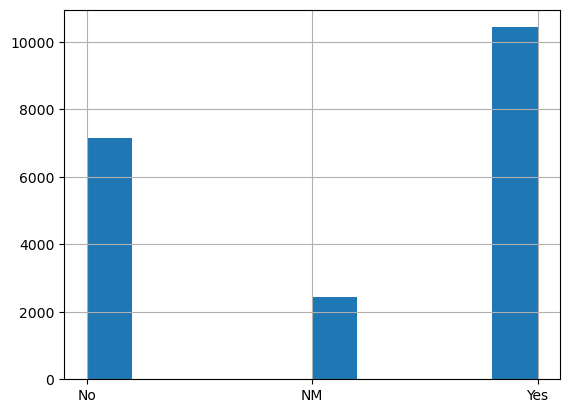

In [14]:
Train_CHA_transformed.Payment_of_Min_Amount.hist()

Kodowanie kolumn

In [15]:
def colums_encoding(df):
    df_encoding = df.copy()
    dict_pay_beh={'Low_spent_Small_value_payments': "0", 
            "Low_spent_Medium_value_payments":"1", 
            "Low_spent_Large_value_payments":"2",
            'High_spent_Small_value_payments': "3",
            'High_spent_Medium_value_payments': "4",
            'High_spent_Large_value_payments': "5"}

    df_encoding.Payment_Behaviour = df_encoding.Payment_Behaviour.map(dict_pay_beh).astype(float)

    dict_target={'Poor': "0", 
          "Standard":"1", 
          "Good":"2"}
    df_encoding.Credit_Score = df_encoding.Credit_Score.map(dict_target).astype(float)

    dict_pay_min_am={'No': "0", 
          "Yes":"1", 
          "NM":"0"}

    df_encoding.Payment_of_Min_Amount = df_encoding.Payment_of_Min_Amount.map(dict_pay_min_am).astype(float)
    return df_encoding

V: Kolumna payment_Behaviour niesie za sobą dwie informacje: spent i value, więc dobrze byłoby to rozbić na dwie kolumny. Poza tym jak widać w komórce poniżej w Payment_Behaviour znajduje się także wartość '!@9#%8', która nie jest brana pod uwagę w mapowaniu.

V: Kolumna dict_pay_min_am jest podzielona na dwie kategorie, pomimo tego, że w oryginale mamy opcje Yes, No i NM. Nic nie wskazuje na to, że można połączyć No i NM w jedną, ponieważ kategoria NM znaczy, że minimalnego progu nie było, a nie że nie został on przekroczony. Można byłoby w tym przypadku użyć np. one-hot encoding.

In [16]:
Train_CHA_transformed['Payment_Behaviour'].unique()

array(['!@9#%8', 'Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments'], dtype=object)

V: Propozycja innego, lepszego kodowania tej kolumny:

In [18]:
def pay_behaviour_encoding(df):
    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    del df["Payment_Behaviour"]
    return df

In [19]:
Train_encoded = colums_encoding(Train_CHA_transformed)
Train_encoded.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,April,23,Lawyer,88752.26,7109.0216666666665,5,6,3,1,Mortgage Loan,...,Good,1180.26,36.713885335936375,18.05,0.0,72.52444300852066,627.5721756392708,NaN,290.8055480188755,1.0
1,February,5419,Mechanic,87745.92,nan,0,1,2,0,NaN,...,Good,207.0,36.12143540230503,20.05,0.0,0.0,366.7904443824298,0.0,639.8255556175702,2.0
2,August,45,_______,8974.555,783.8795833333335,10,8,28,7,"Home Equity Loan, Debt Consolidation Loan, Not...",...,,1660.14,33.88323959434667,16.10,1.0,30.443262439394022,57.441335697106105,0.0,280.50336019683317,1.0
3,August,32,Manager,17091.96,1182.33,10,8,23,5,"Payday Loan, Student Loan, Personal Loan, Payd...",...,Bad,4047.31,40.077930390412384,8.05,1.0,54.857945863955706,10000,0.0,282.35488387401983,0.0
4,July,34,Developer,49128.9,4231.074999999999,8,3,29,6,"Not Specified, Payday Loan, Personal Loan, Hom...",...,Standard,2574.1,29.415814109640923,14.04,1.0,169.5292210820439,94.40828486614019,5.0,399.1699940518158,0.0


In [20]:
Train_encoded.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary        object
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                object
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date          object
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio     object
Credit_History_Age           object
Payment_of_Min_Amount       float64
Total_EMI_per_month          object
Amount_invested_monthly      object
Payment_Behaviour           float64
Monthly_Balance              object
Credit_Score                float64
dtype: object

In [21]:
def encoding_to_int(df):
    df_encoding_int = df.copy()
    columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
             'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
             'Interest_Rate', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Credit_History_Age', 'Payment_Behaviour']
    for i in columns:
        df_encoding_int[i] = df_encoding_int[i].astype(float)
    return df_encoding_int

V: To raczej encoding_to_float a nie int...

In [22]:
Train_encoded_int = encoding_to_int(Train_encoded)
Train_encoded_int.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                float64
dtype: object

In [23]:
def dropping2(df):
    df_drop = df.copy()
    df_drop = df_drop.drop(["Credit_Mix", "Changed_Credit_Limit", "Month", "Type_of_Loan"] , axis=1)
    return df_drop

V: Na jakiej podstawie owe kolumny są wyrzucane?!

In [24]:
# V:
for col in ["Credit_Mix", "Changed_Credit_Limit", "Month", "Type_of_Loan"]:
    print(Train_encoded_int[col].unique())

['Good' '' 'Bad' 'Standard']
['5.02' '11.08' '14.87' ... '2.5700000000000003' '23.18' '20.94']
['April' 'February' 'August' 'July' 'May' 'March' 'January' 'June']
['Mortgage Loan' nan
 'Home Equity Loan, Debt Consolidation Loan, Not Specified, Personal Loan, Not Specified, Payday Loan, and Credit-Builder Loan'
 ...
 'Student Loan, Personal Loan, Payday Loan, Payday Loan, Student Loan, and Student Loan'
 'Payday Loan, Mortgage Loan, Student Loan, Not Specified, and Home Equity Loan'
 'Mortgage Loan, Not Specified, Personal Loan, Home Equity Loan, Not Specified, and Auto Loan']


V: Dla Credit_Mix i Month należałoby zrobić proste mapowanie na wartości numeryczne a Changed_Credit_Limit już jest numeryczną kolumną. Jeśli chodzi o Type_of_Loan sytuacja jest faktycznie nieco bardziej skomplikowana. Należałoby zebrać wszystkie pojedyńcze typy kredytów, a następnie zrobić kolumnę dla każdego typu i wstawić jedynki, jeśli dany typ występuje w Type_of_Loan (tak jak to zostało zrobione z Occupation)

In [25]:
Train_dropped = dropping2(Train_encoded_int)

In [26]:
Train_dropped.Occupation.value_counts()

Lawyer           1396
_______          1383
Engineer         1294
Mechanic         1279
Entrepreneur     1276
Teacher          1272
Accountant       1249
Scientist        1248
Doctor           1247
Manager          1234
Architect        1233
Media_Manager    1217
Developer        1202
Musician         1182
Journalist       1170
Writer           1118
Name: Occupation, dtype: int64

In [27]:
def occupation_agg(df):
    df_agg = df.copy()
    df_agg['Occupation'] = df_agg['Occupation'].astype(str).str.replace('_______','Other')
    df_agg = pd.get_dummies(df_agg, prefix='Occupation', columns=['Occupation'], drop_first=False)
    df_agg = df_agg.drop_duplicates()
    return df_agg

V: W porządku

In [30]:
Train_occ_agg = occupation_agg(Train_dropped)
Train_occ_agg.dtypes

Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                float64
Occupation_Accountant         uint8
Occupation_Architect          uint8
Occupation_Developer          uint8
Occupation_Doctor             uint8
Occupation_Engineer           uint8
Occupation_Entrepreneur       uint8
Occupation_Journalist         uint8
Occupation_Lawyer             uint8
Occupation_Manager            uint8
Occupation_Mechanic         

In [31]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

Zamiana nulli

In [32]:
Train_swaped = swap_columns(Train_occ_agg, 'Credit_Score', 'Occupation_Writer')
Train_swaped.isnull().sum()

Age                            0
Annual_Income                  0
Monthly_Inhand_Salary       3034
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      1418
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1747
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      863
Payment_Behaviour           1449
Monthly_Balance              241
Occupation_Writer              0
Occupation_Accountant          0
Occupation_Architect           0
Occupation_Developer           0
Occupation_Doctor              0
Occupation_Engineer            0
Occupation_Entrepreneur        0
Occupation_Journalist          0
Occupation_Lawyer              0
Occupation_Manager             0
Occupation_Mechanic            0
Occupation_Media_Manager       0
Occupation_Musician            0
Occupation

In [43]:
def fill_missing_values(df):
    df_na = df.copy()
    cols = ["Monthly_Inhand_Salary", "Num_of_Delayed_Payment", "Credit_History_Age", 
          "Amount_invested_monthly", "Payment_Behaviour", "Monthly_Balance"]
    for i in cols:
        df_na[i].fillna(df[i].median(), inplace = True)
    return df_na

V: Lepsze byłoby użycie wszystkich kolumn, gdyż nie wiemy czy w zbiorze testowym nie natrafimy na nulle w jakiejś innej kolumnie.
Dochodzimy do momentu gdzie mogłaby przydać się kolumna customer_id - w celu uzyskania lepszej wartości do uzupełniania danych moglibyśmy pogrupować po customer_id i brać medianę z tych wierszy: 
df[column] = df[column].fillna(df.groupby('Customer_ID'[column].transform("median")) i na końcu dopełnić globalną medianą.

Korelacje i outliery

<AxesSubplot:>

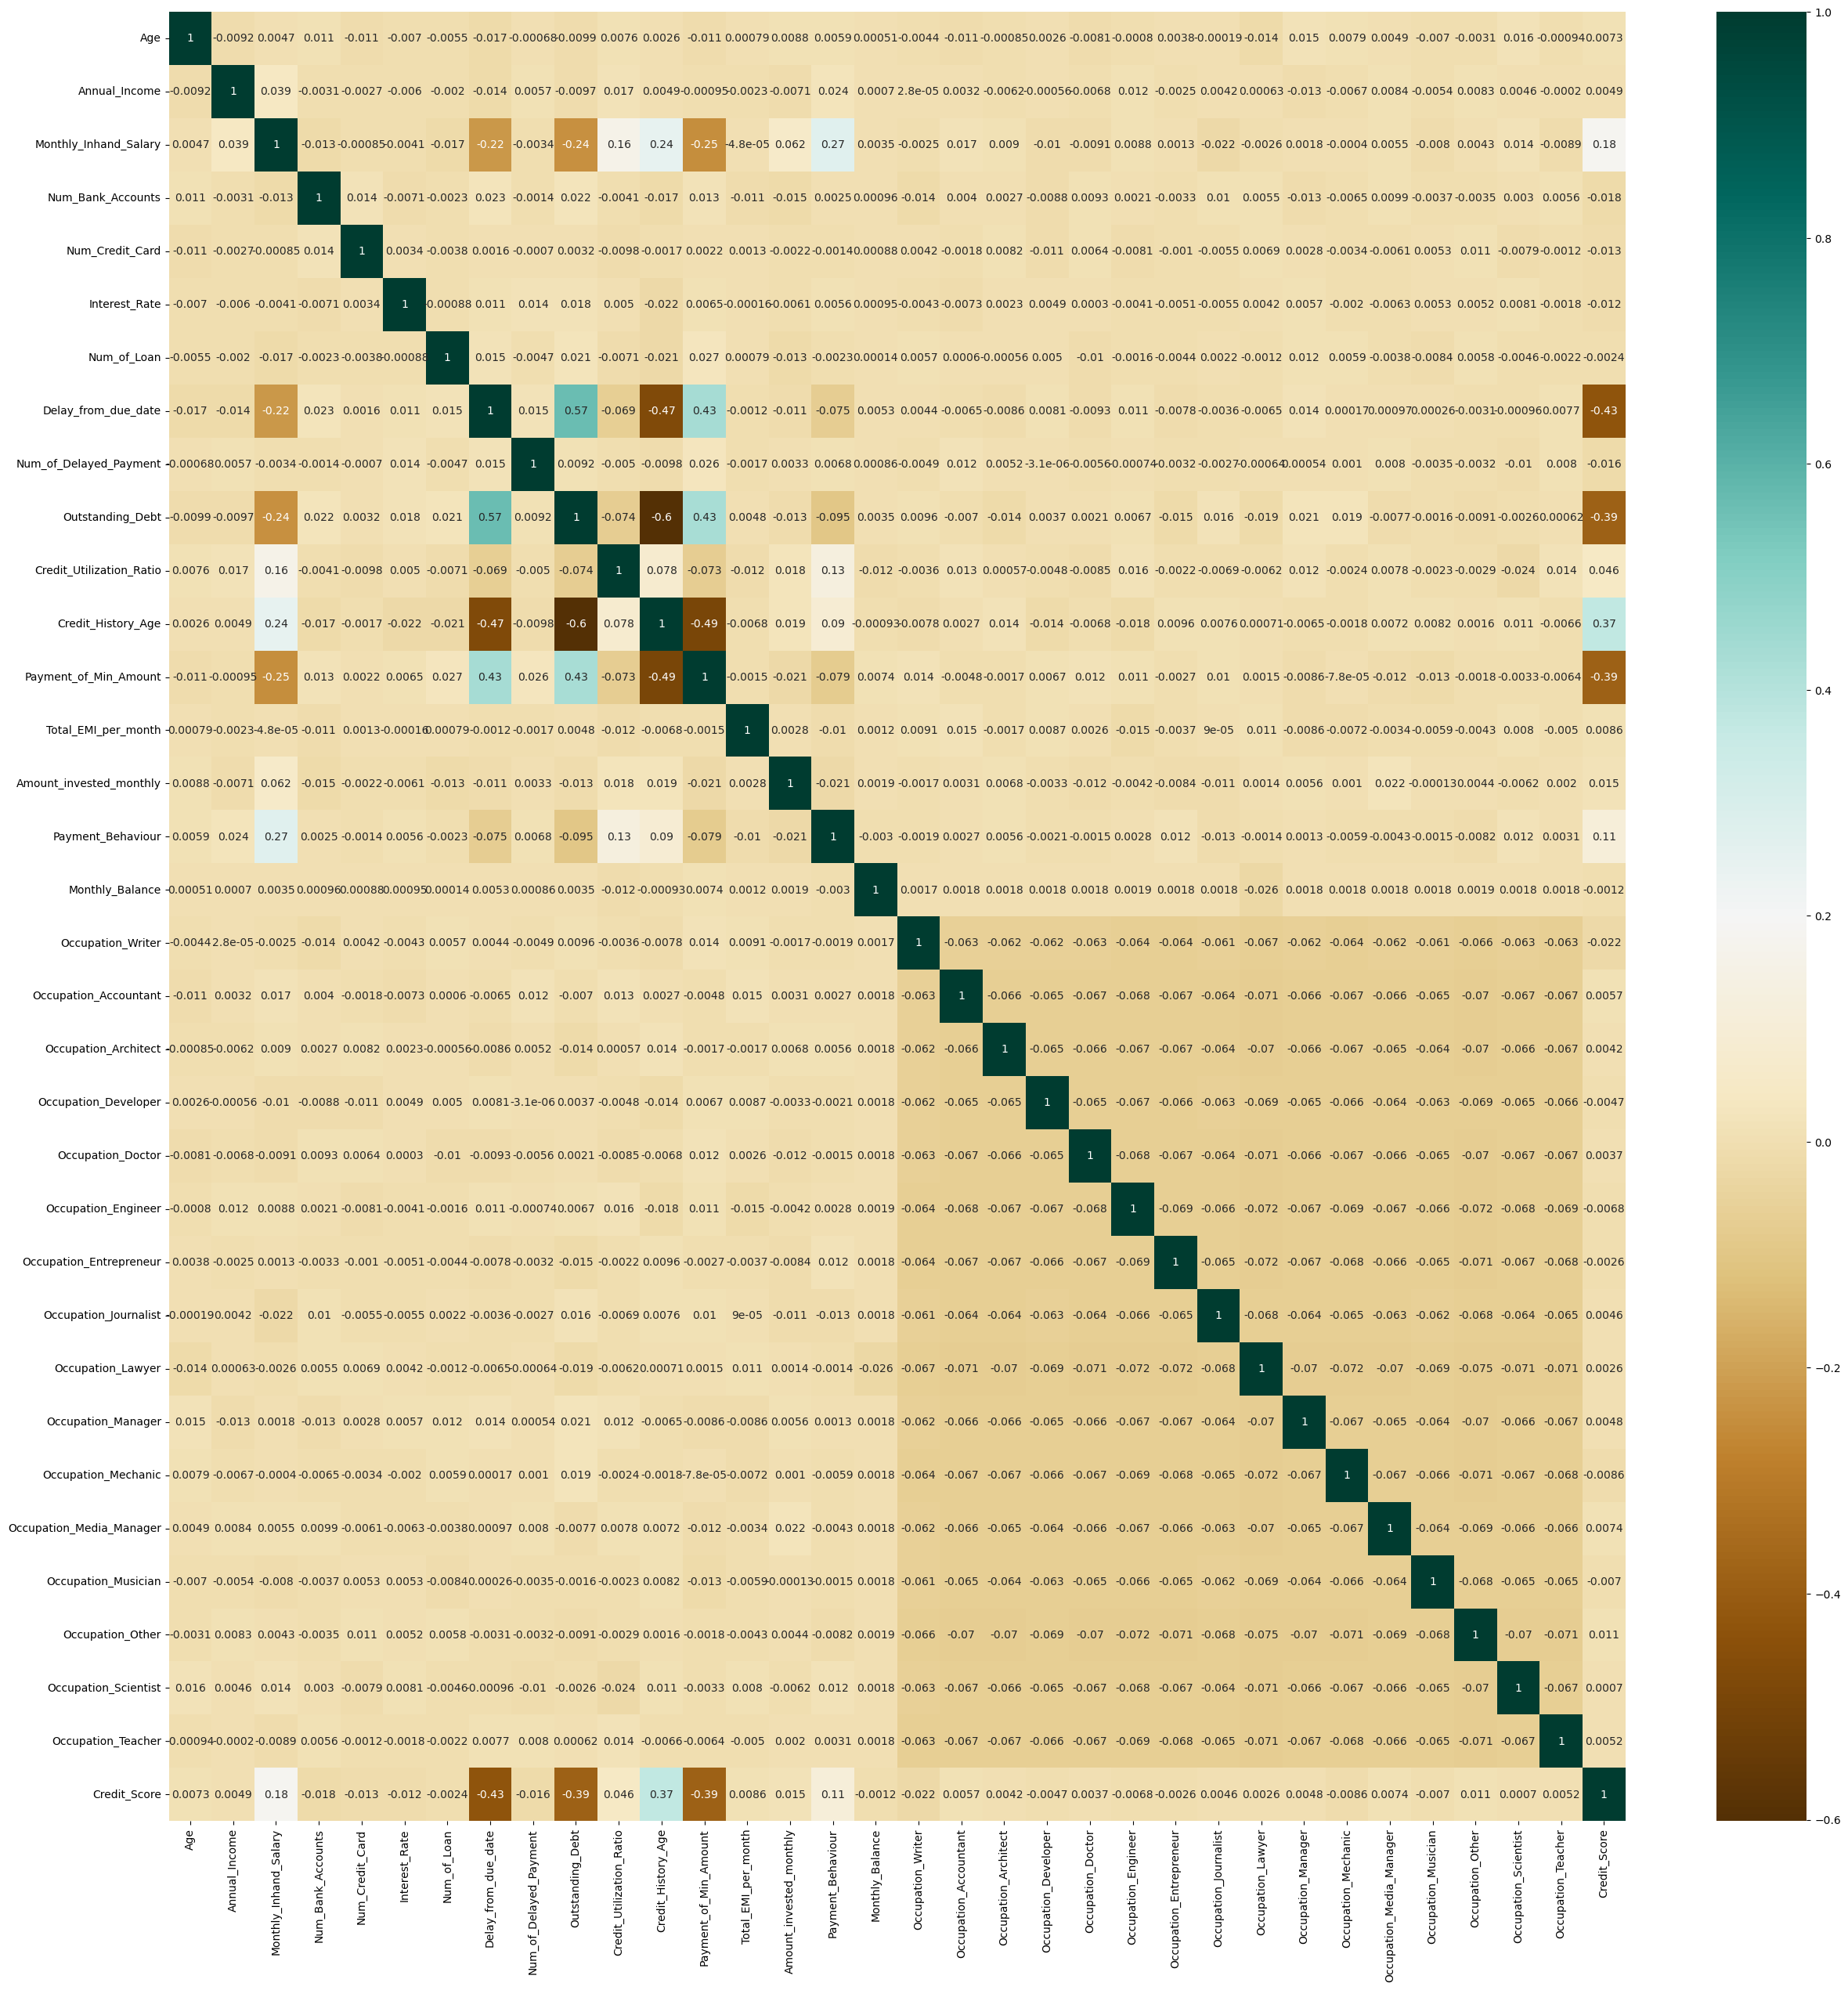

In [34]:
Train_na = fill_missing_values(Train_swaped)
corr_matrix = Train_na.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,cmap="BrBG",annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>],
       [<AxesSubplot:title={'center':'Payment_of_Min_Amount'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Payment_Behaviour'}>],
       [<AxesSubplot:title={'center'

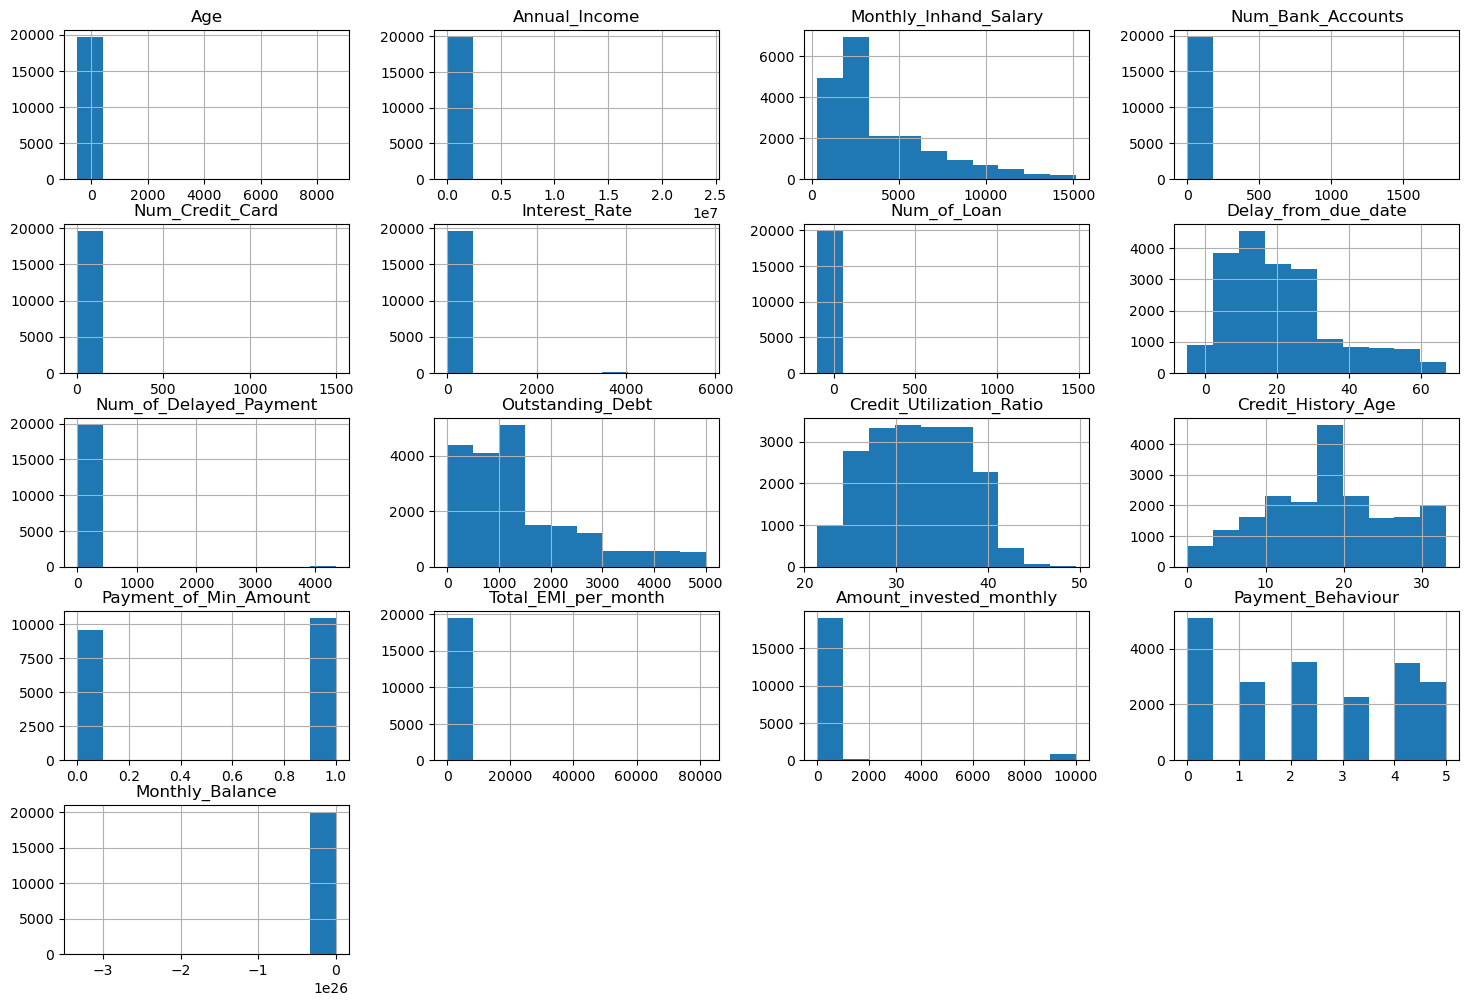

In [35]:
Train_na.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))


In [44]:
def outliers_agg(df):
    names = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Num_of_Delayed_Payment",
         "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]
    df_agg = df.copy()
    for i in names:
        upper_lim = df_agg[i].quantile(.95)
        lower_lim = df_agg[i].quantile(.05)
        df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                       np.where(df_agg[i]>upper_lim, upper_lim,
                        df_agg[i]))
    return df_agg

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>],
       [<AxesSubplot:title={'center':'Payment_of_Min_Amount'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Payment_Behaviour'}>],
       [<AxesSubplot:title={'center'

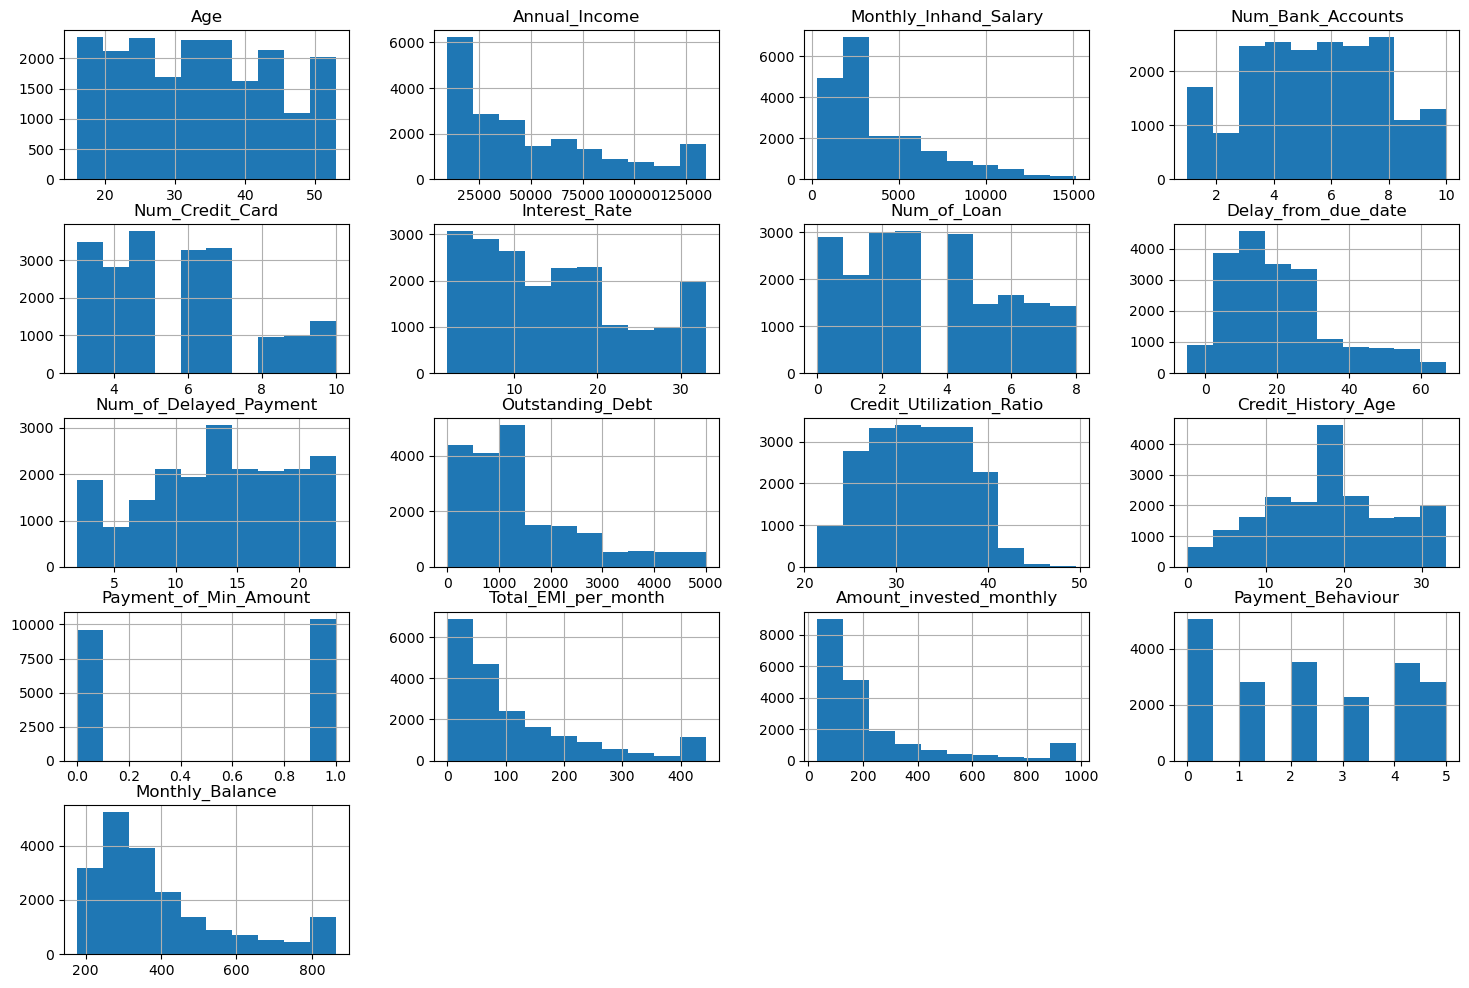

In [37]:
Train_outliers = outliers_agg(Train_na)
Train_outliers.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))

V: Dobre zadządzenie outlierami - rozkłady zmiennych wyglądają o wiele lepiej

<AxesSubplot:>

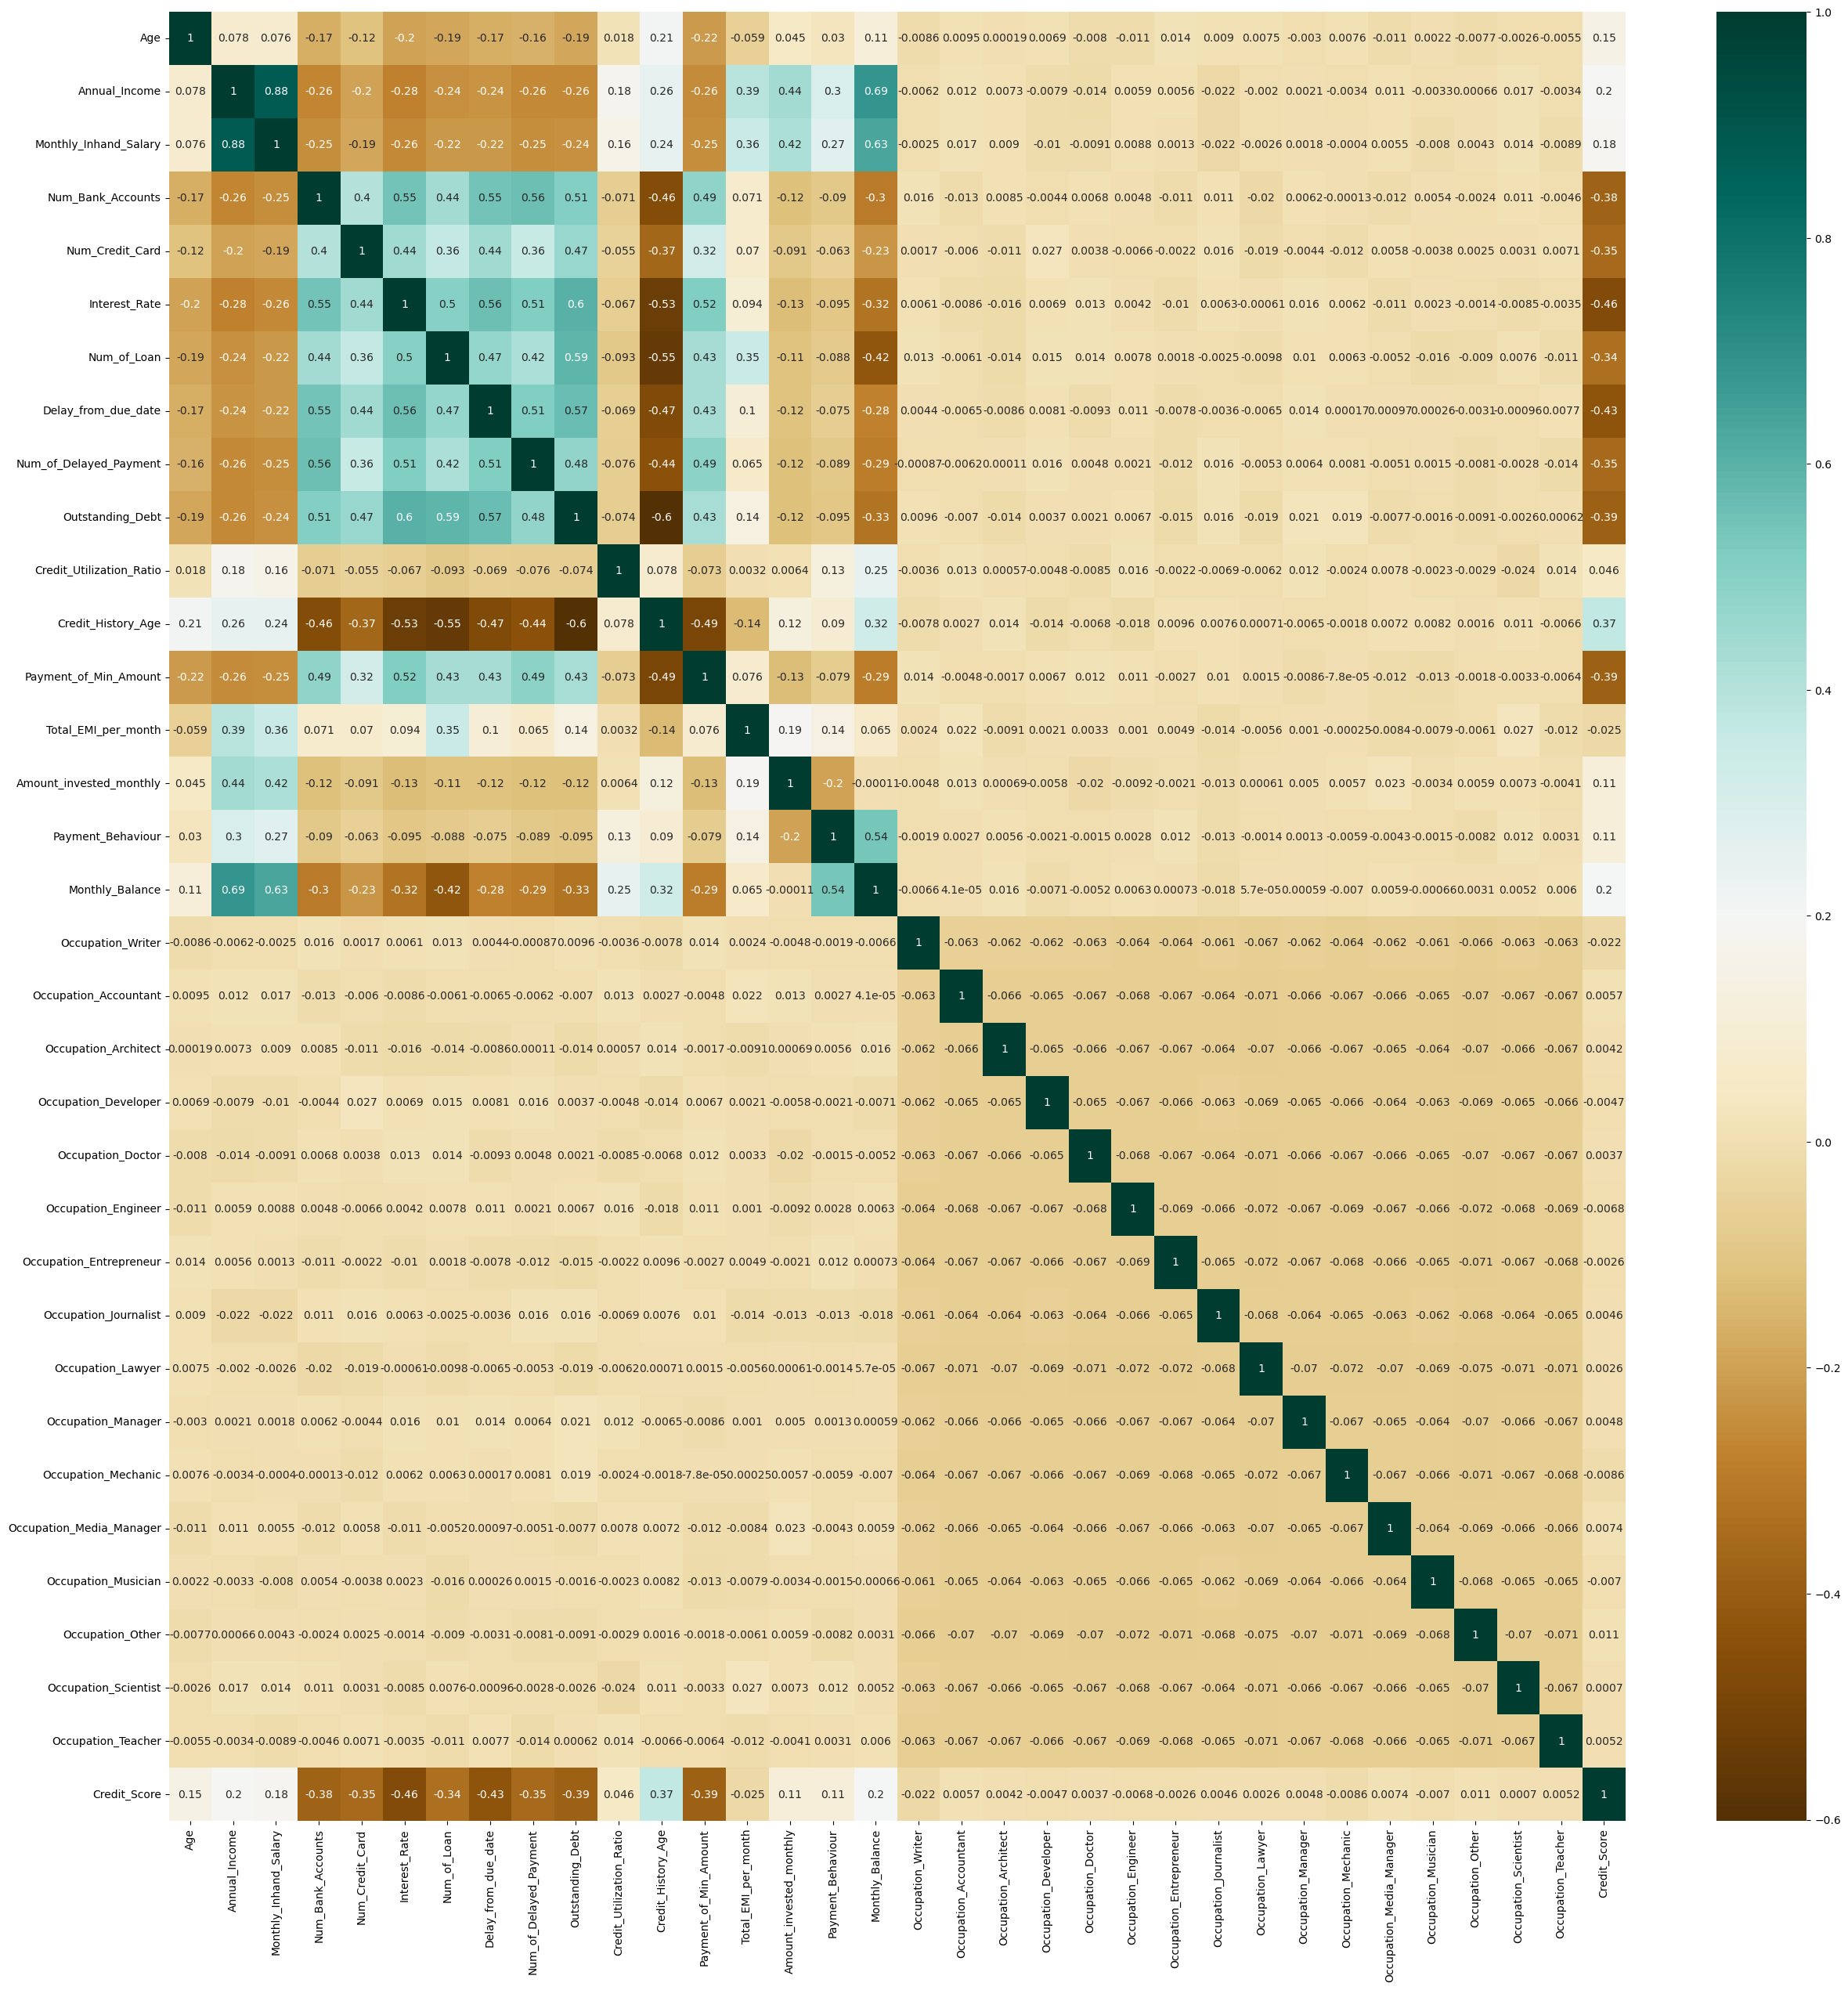

In [38]:
corr_matrix_p = Train_outliers.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix_p,cmap="BrBG",annot=True)


In [45]:
def drop_corr(df):
    df_drop = df.copy()
    df_drop = df_drop.drop(["Total_EMI_per_month", "Credit_Utilization_Ratio", "Monthly_Inhand_Salary"], axis = 1)
    return df_drop

V: Sensowny wybór kolumn do wyrzucenia

In [46]:
Train_drop_corr = drop_corr(Train_outliers)

Normalizacja i standaryzacja

In [47]:
def normal_stand(df):
    df_norm = df.copy()
    norm_col = ["Age", "Annual_Income", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",
              "Num_of_Delayed_Payment", "Outstanding_Debt", "Amount_invested_monthly", "Payment_Behaviour",
              "Monthly_Balance"]
    std_col = ["Num_Bank_Accounts", "Delay_from_due_date", "Credit_History_Age"]
    scaler_norm = MinMaxScaler()
    scaler_std = StandardScaler()
    for i in df_norm[norm_col]:
        df_norm[i] = scaler_norm.fit_transform(df_norm[[i]])

    for i in df_norm[std_col]:
        df_norm[i] = scaler_std.fit_transform(df_norm[[i]])

    return df_norm

V: Brak zarzutów do tej części

In [49]:
Train_norm = normal_stand(Train_drop_corr)
Train_norm.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Other,Occupation_Scientist,Occupation_Teacher,Credit_Score
0,0.189189,0.633350,-0.186002,0.428571,0.032258,0.125,-1.353633,0.571429,0.236108,0.006508,...,0,1,0,0,0,0,0,0,0,1.0
1,1.000000,0.625297,-1.759786,0.000000,0.000000,0.000,-1.286137,0.000000,0.041372,0.257442,...,0,0,0,1,0,0,0,0,0,2.0
2,0.783784,0.000000,1.781229,0.714286,0.838710,0.875,-0.003716,1.000000,0.332125,-0.238152,...,0,0,0,0,0,0,1,0,0,1.0
3,0.432432,0.059890,1.781229,0.714286,0.677419,0.625,0.198772,0.857143,0.809766,-1.248159,...,0,0,1,0,0,0,0,0,0,0.0
4,0.486486,0.316265,0.994336,0.000000,0.870968,0.750,-0.678674,0.476190,0.514996,-0.496613,...,0,0,0,0,0,0,0,0,0,0.0


In [50]:
def X_y_transform(df):
    y = pd.Series(df['Credit_Score'])
    X = df.drop(['Credit_Score'],axis=1)
    return X,y

In [51]:
X_train,y_train = X_y_transform(Train_norm)

In [67]:
def data_preprocessing(X,y):
    df = create_df(X,y)
    df = drop_columns(df)
    df = clean_records(df)
    df = Credit_History_Age_trasform(df)
    df = colums_encoding(df)
    df = encoding_to_int(df)
    df = dropping2(df)
    df = occupation_agg(df)
    df = swap_columns(df, 'Credit_Score', 'Occupation_Writer')
    df = fill_missing_values(df)
    df = outliers_agg(df)
    df = drop_corr(df)
    df = normal_stand(df)

    return X_y_transform(df)

V: Można byłoby zrobić to jako pipeline - byłoby bardziej profesjonalnie

In [ ]:
'''
X_test, y_test = data_preprocessing(X_test, y_test)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)
'''

accuracy= 0.7743125


V: na koniec przetestowanie modelu na zbiorze walidacyjnym - tu już train to treningowy a val walidacyjny

In [63]:
data = pd.read_csv("data.csv", low_memory=False)

In [64]:
y = pd.Series(data['Credit_Score'])
X = data.drop(['Credit_Score'],axis=1)
# Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
     X_train, y_train, test_size=0.2, random_state=123
)

In [68]:
X_val, y_val = data_preprocessing(X_val, y_val)

C:\Users\tymek\AppData\Local\Temp\ipykernel_18748\1182851745.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


In [69]:
X_train, y_train = data_preprocessing(X_train, y_train)

C:\Users\tymek\AppData\Local\Temp\ipykernel_18748\1182851745.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_val)
rf_accuracy = accuracy_score(y_val,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.77335


V: Accuracy w zasadzie identyczne jak na testowym - dobry preprocessing:) 